In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
k = 2

task1

In [3]:
a = np.sin(k)
b = np.cos(k)

A = -1
B = 1

In [4]:
def q(x):
    return (1 + b * x * x) / a

def f(x):
    return -1 / a

def p(x):
    return 0

In [5]:
def решить_разностной_схемой(p, q, f, A, B, Ua, Ub, n=2_000):
    if n > 2_000:
        n = 2_000

    h = (B - A) / n
    xs = [round(x, 3) for x in np.linspace(A, B, n + 1)]

    diags = [
        [(1 + h * p(x) / 2) for x in xs],
        [(1*h*h*q(x) - 2) for x in xs],
        [(1 - h * p(x) / 2) for x in xs]
    ]

    syst = []
    for _ in range(n+1):
        syst.append([0]*(n+1))

    syst[0][0] = 1
    syst[-1][-1] = 1

    i = 1
    j = 1
    while i < n:
        syst[i][j+1] = diags[2][i+1]    # k+1
        syst[i][j] = diags[1][i]      # k
        syst[i][j-1] = diags[0][i-1]    # k-1
        i += 1
        j += 1    

    vec = [h * h * f(x) for x in xs]
    vec[0] = Ua
    vec[-1] = Ub

    ys = [round(y, 3) for y in np.linalg.solve(syst, vec)]

    return xs, ys

(x: y(x))

[(-1.0, 0.0), (-0.999, 0.002), (-0.998, 0.003), (-0.997, 0.005), (-0.996, 0.007), (-0.995, 0.009), (-0.994, 0.01), (-0.993, 0.012), (-0.992, 0.014), (-0.991, 0.016), (-0.99, 0.017)]...

...[(-0.004, 0.964), (-0.003, 0.964), (-0.002, 0.964), (-0.001, 0.964), (0.0, 0.964), (0.001, 0.964), (0.002, 0.964), (0.003, 0.964), (0.004, 0.964), (0.005, 0.964), (0.006, 0.964)]...

...[(0.99, 0.017), (0.991, 0.016), (0.992, 0.014), (0.993, 0.012), (0.994, 0.01), (0.995, 0.009), (0.996, 0.007), (0.997, 0.005), (0.998, 0.003), (0.999, 0.002), (1.0, 0.0)]



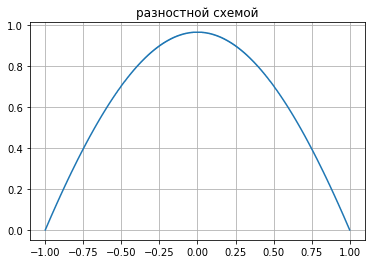

In [6]:
xs, ys = решить_разностной_схемой(p, q, f, A, B, Ua=0, Ub=0)
n = len(xs)

grid_func = list(zip(xs, ys))

print('(x: y(x))')
print(f'''
{grid_func[:11]}...

...{grid_func[(n+1)//2 - 5: (n+1)//2 + 5 + 1]}...

...{grid_func[-11:]}
''' if len(grid_func) > 10 else grid_func)

plt.plot(xs, ys)
plt.title("разностной схемой")
plt.grid()
plt.show()

task2

In [7]:
# u(a) = Ua
# u(b) = ub

A = 0
B = 2
Ua = 0
Ub = 5
eps = 0.05

def p(x):
    return np.exp(-x*x)

def q(x):
    return 5 * (2 + np.sin(2 * x))

def f(x):
    return np.exp(x) * (1 + np.sin(2 * x))

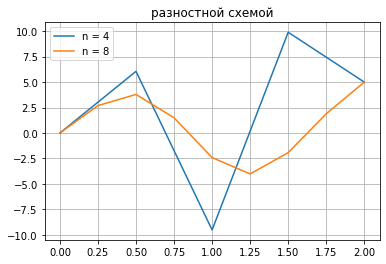

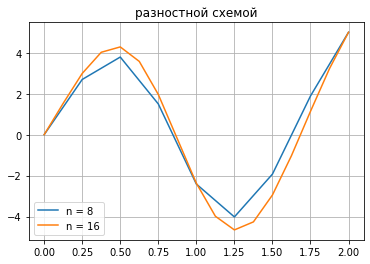

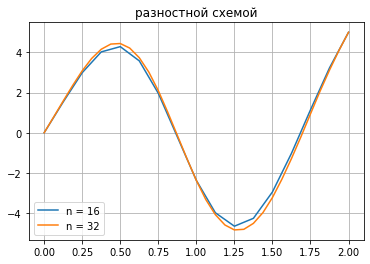

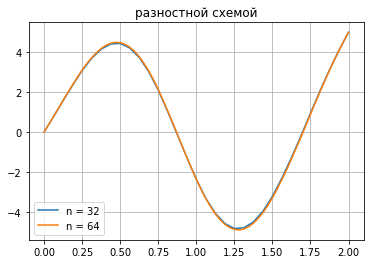

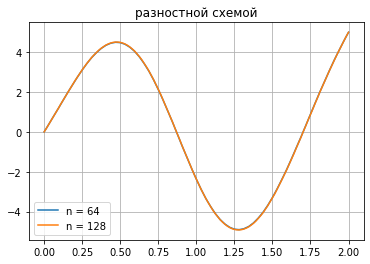

(x: y(x))

[(0.0, -0.0), (0.016, 0.193), (0.031, 0.388), (0.047, 0.587), (0.062, 0.786), (0.078, 0.988), (0.094, 1.19), (0.109, 1.392), (0.125, 1.594), (0.141, 1.795), (0.156, 1.994)]...

...[(0.922, -0.983), (0.938, -1.272), (0.953, -1.557), (0.969, -1.837), (0.984, -2.11), (1.0, -2.376), (1.016, -2.632), (1.031, -2.88), (1.047, -3.116), (1.062, -3.341), (1.078, -3.554)]...

...[(1.844, 2.549), (1.859, 2.818), (1.875, 3.082), (1.891, 3.342), (1.906, 3.597), (1.922, 3.846), (1.938, 4.089), (1.953, 4.327), (1.969, 4.558), (1.984, 4.782), (2.0, 5.0)]



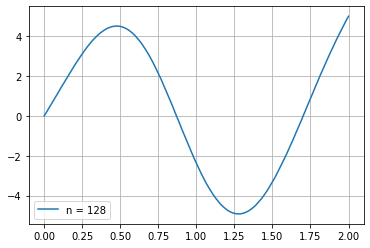

In [8]:
n = 4

xs_pre, ys_pre = решить_разностной_схемой(p, q, f, A, B, Ua, Ub, n=n)

found = False
while not found:
    n *= 2
    xs_post, ys_post = решить_разностной_схемой(p, q, f, A, B, Ua, Ub, n=n)

    tmp = ys_post[::2]

    for i in range(1, len(ys_pre) - 1):
        if abs(ys_pre[i] - tmp[i]) > eps:
            found = False
            break
        found = True

    plt.plot(xs_pre, ys_pre, label=f"n = {n//2}")
    plt.plot(xs_post, ys_post, label=f"{n = }")
    plt.title("разностной схемой")
    plt.legend()
    plt.grid()
    plt.show()
    
    xs_pre = xs_post[:]
    ys_pre = ys_post[:]

    if n > 2000:
        break

grid_func = list(zip(xs_pre, ys_pre))

print('(x: y(x))')
print(f'''
{grid_func[:11]}...

...{grid_func[(n+1)//2 - 5: (n+1)//2 + 5 + 1]}...

...{grid_func[-11:]}
''' if len(grid_func) > 10 else grid_func)

plt.plot(xs_pre, ys_pre, label=f'{n = }')
plt.grid()
plt.legend()
plt.show()

    

task3

In [9]:
A = 0.4
B = 1.4
Ua = 1.2
Ub = ...

eps = 0.05

In [10]:
def p(x):
    return -0.5 * x

def q(x):
    return 1

def f(x):
    return 2

In [11]:
def решить_разностной_схемой3(p, q, f, A, B, Ua, Ub, n=2_000):
    if n > 2_000:
        n = 2_000

    h = (B - A) / n
    xs = [round(x, 3) for x in np.linspace(A, B, n + 1)]

    diags = [
        [(1 - h * p(x) / 2) for x in xs],
        [(1*h*h*q(x) - 2) for x in xs],
        [(1 + h * p(x) / 2) for x in xs],
    ]

    syst = []
    for _ in range(n+1):
        syst.append([0]*(n+1))

    syst[0][0] = 1
    syst[-1][-1] = 1

    i = 1
    j = 1
    while i < n:
        syst[i][j+1] = diags[2][i+1]    # k+1
        syst[i][j] = diags[1][i]      # k
        syst[i][j-1] = diags[0][i-1]    # k-1
        i += 1
        j += 1    
    syst[-1][-1] = h+3
    syst[-1][-2] = -4
    syst[-1][-3] = 1

    vec = [h * h * f(x) for x in xs]
    vec[0] = Ua
    vec[-1] = 3.2 * h

    ys = [round(y, 3) for y in np.linalg.solve(syst, vec)]

    return xs, ys

(x: y(x))

[(0.4, 1.2), (0.4, 1.2), (0.401, 1.199), (0.402, 1.199), (0.402, 1.199), (0.402, 1.198), (0.403, 1.198), (0.404, 1.198), (0.404, 1.198), (0.404, 1.197), (0.405, 1.197)]...

...[(0.43, 1.183), (0.43, 1.182), (0.43, 1.182), (0.431, 1.182), (0.432, 1.182), (0.432, 1.181), (0.432, 1.181), (0.433, 1.181), (0.434, 1.18), (0.434, 1.18), (0.434, 1.18)]...

...[(1.395, 1.306), (1.395, 1.307), (1.396, 1.307), (1.396, 1.308), (1.397, 1.308), (1.398, 1.309), (1.398, 1.309), (1.398, 1.309), (1.399, 1.31), (1.399, 1.31), (1.4, 1.311)]



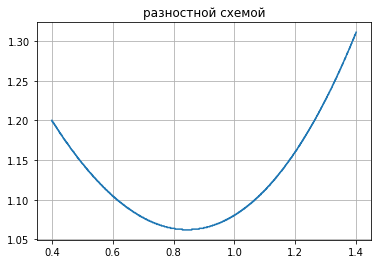

In [12]:
xs, ys = решить_разностной_схемой3(p, q, f, A, B, Ua, Ub)

grid_func = list(zip(xs, ys))

print('(x: y(x))')
print(f'''
{grid_func[:11]}...

...{grid_func[(n+1)//2 - 5: (n+1)//2 + 5 + 1]}...

...{grid_func[-11:]}
''' if len(grid_func) > 10 else grid_func)

plt.plot(xs, ys)
plt.title("разностной схемой")
plt.grid()
plt.show()

task4

In [13]:
a = 0
b = 1.8
c = 1.275 

A = a
B = b

In [14]:
def k(x):
    if a <= x < c:
        return 0.4
    if c <= x <= b:
        return 1.4
    return 0

def p(x):
    return 0

def q(x):
    res = 0
    if a < x < c:
        res = 3.2
    if c < x < b:
        res =  12
    return res/(-k(x))

def f(x):
    return 8*x*(2 - x*x)/(-k(x))

In [15]:
def решить_разностной_схемой4(k, p, q, f, A, B, n=2000):
    if n > 2000:
        n = 2000
    
    h = (B - A)/n

    xs = [round(x, 3) for x in np.linspace(A, B, n + 1)]

    diags = [
        [(1 - h * p(x) / 2) for x in xs],
        [(1*h*h*q(x) - 2) for x in xs],
        [(1 + h * p(x) / 2) for x in xs],
    ]

    syst = []
    for _ in range(n+1):
        syst.append([0]*(n+1))
    
    syst[0][0] = h/2+k(A)
    syst[0][1] = -k(A)
    i = 1
    j = 1
    while i < n:
        syst[i][j+1] = diags[2][i+1]    # k+1
        syst[i][j] = diags[1][i]      # k
        syst[i][j-1] = diags[0][i-1]    # k-1
        i += 1
        j += 1    
    syst[-1][-1] = k(B) + h
    syst[-1][-2] = -k(B)

    vec = [h * h * f(x) for x in xs]
    vec[0] = 0
    vec[-1] = 0

    ys = [round(y, 3) for y in np.linalg.solve(syst, vec)]

    return xs, ys

(x: y(x))

[(0.0, 0.868), (0.028, 0.899), (0.056, 0.934), (0.084, 0.974), (0.112, 1.017), (0.141, 1.063), (0.169, 1.111), (0.197, 1.161), (0.225, 1.212), (0.253, 1.264), (0.281, 1.316)]...

...[(0.759, 1.863), (0.788, 1.858), (0.816, 1.847), (0.844, 1.831), (0.872, 1.809), (0.9, 1.782), (0.928, 1.749), (0.956, 1.711), (0.984, 1.667), (1.012, 1.617), (1.041, 1.562)]...

...[(1.519, 0.286), (1.547, 0.23), (1.575, 0.178), (1.603, 0.131), (1.631, 0.089), (1.659, 0.053), (1.688, 0.022), (1.716, -0.002), (1.744, -0.018), (1.772, -0.026), (1.8, -0.026)]



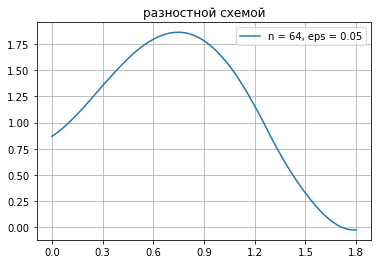

In [16]:
n = 4
xs, ys = решить_разностной_схемой4(k, p, q, f, A, B, n)
eps = 0.05

found = False
while not found:
    n *= 2
    xs_p, ys_p = решить_разностной_схемой4(k, p, q, f, A, B, n)

    ys_t = ys_p[::2]

    for i in range(len(ys)):
        if abs(ys[i] - ys_t[i]) > eps:
            found = False
            break
        found = True

    xs, ys = xs_p, ys_p

    if n > 2000:
        break

grid_func = list(zip(xs_p, ys_p))

print('(x: y(x))')
print(f'''
{grid_func[:11]}...

...{grid_func[(n+1)//2 - 5: (n+1)//2 + 5 + 1]}...

...{grid_func[-11:]}
''' if len(grid_func) > 33 else grid_func)

plt.plot(xs, ys, label=f"{n = }, {eps = }")
plt.xticks(np.linspace(A, B, 7))
plt.title("разностной схемой")
plt.legend()
plt.grid()
plt.show()